<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#How-to-use" data-toc-modified-id="How-to-use-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>How to use</a></span></li><li><span><a href="#Forest-fire" data-toc-modified-id="Forest-fire-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Forest fire</a></span></li><li><span><a href="#Nearest-neighbor" data-toc-modified-id="Nearest-neighbor-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Nearest neighbor</a></span></li><li><span><a href="#Next-nearest-neighbor" data-toc-modified-id="Next-nearest-neighbor-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Next nearest neighbor</a></span></li><li><span><a href="#Triangular-lattice" data-toc-modified-id="Triangular-lattice-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Triangular lattice</a></span></li><li><span><a href="#Honeycomb-lattice" data-toc-modified-id="Honeycomb-lattice-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Honeycomb lattice</a></span></li><li><span><a href="#Kagome-lattice" data-toc-modified-id="Kagome-lattice-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Kagome lattice</a></span></li><li><span><a href="#d-dimensional-simple-lattice" data-toc-modified-id="d-dimensional-simple-lattice-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>d dimensional simple lattice</a></span></li><li><span><a href="#Percolating-probability" data-toc-modified-id="Percolating-probability-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Percolating probability</a></span><ul class="toc-item"><li><span><a href="#square-lattice,-nearest-neighbor" data-toc-modified-id="square-lattice,-nearest-neighbor-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>square lattice, nearest neighbor</a></span></li><li><span><a href="#square-lattice,-next-nearest-neighbor" data-toc-modified-id="square-lattice,-next-nearest-neighbor-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>square lattice, next nearest neighbor</a></span></li><li><span><a href="#triangular-lattice" data-toc-modified-id="triangular-lattice-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>triangular lattice</a></span></li><li><span><a href="#simple-lattice" data-toc-modified-id="simple-lattice-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>simple lattice</a></span></li><li><span><a href="#honeycomb-lattice" data-toc-modified-id="honeycomb-lattice-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>honeycomb lattice</a></span></li><li><span><a href="#Kagome-lattice" data-toc-modified-id="Kagome-lattice-9.6"><span class="toc-item-num">9.6&nbsp;&nbsp;</span>Kagome lattice</a></span></li></ul></li></ul></div>

# How to use

This package use PyPlot to visualize figure and ImageMagick to make gif animation. If you haven't installed these packages, you have to do before using this package.

In [1]:
#Pkg.add("PyPlot")
#Pkg.clone("https://github.com/goropikari/Percolation.jl")
push!(LOAD_PATH, "../src")
using Percolation, PyPlot

#  Forest fire

First we make $N \times N$ lattice. Then we open each site with probability p and occupied with probability 1-p.

In [2]:
# N: lattice size
# p: occupied probability
N = 100; p = 0.6
site = Forest(N, p)

Percolation.Forest(100, 0.6, [0 1 … 1 1; 0 1 … 0 0; … ; 0 1 … 1 0; 0 1 … 1 1])

To visualize initial condition, type following code.
The white, green and red sites correspond to open, lived tree and burned tree sites, respectively.
We assume the left column of this forest lit up and it permeates the forest gradually.
If a nearest neighbor site of a lived tree site is open, the open site becomes burned tree site.

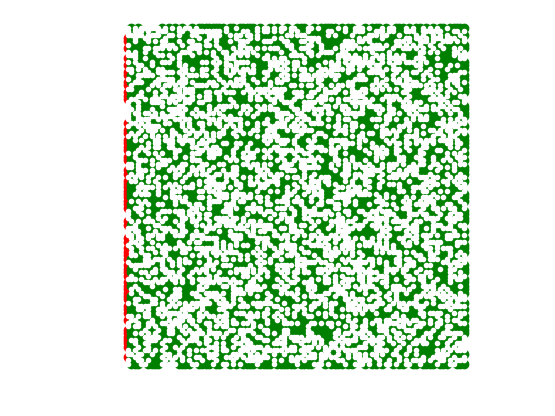

In [3]:
forestplot(site)

`forestfire!` function returns lifetime of fire (when fire penetrates the forest or when fire doesn't spread) and convert to final state.

In [4]:
forestfire!(site)

202

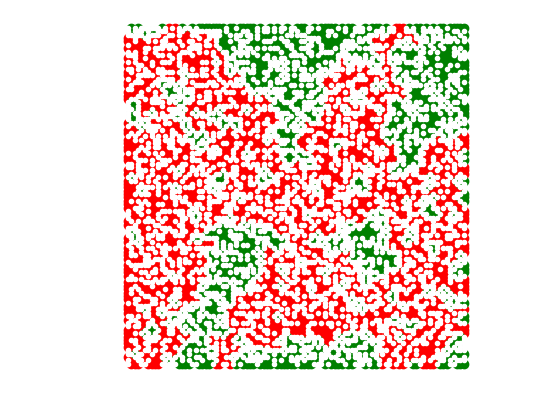

In [5]:
forestplot(site)

# Nearest neighbor

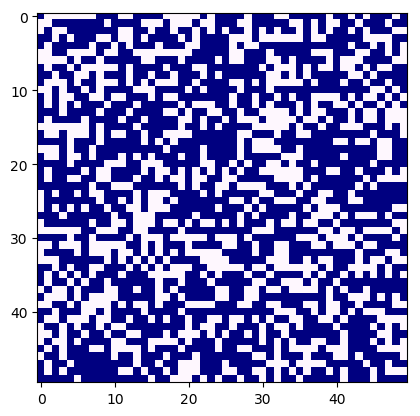

PyObject <matplotlib.image.AxesImage object at 0x7fb21bfe6e48>

In [6]:
N = 50; p = 0.6
site = Squarenn(N, p)
imshow(site.lattice, cmap="gist_ncar")

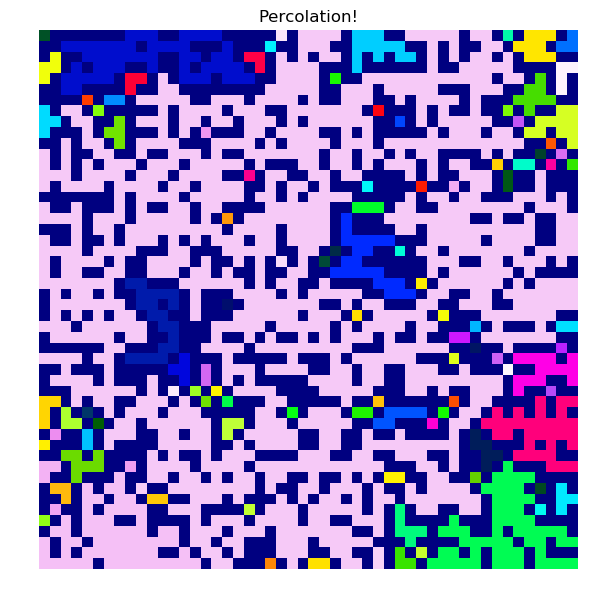

In [7]:
cluster!(site)
clusterplot(site)
# imshow(site.lattice, cmap="gist_ncar")

# Next nearest neighbor

If you want to simulate not only nearest neighbor but next nearest neighbor, use squarennn type.

In [8]:
N = 100; p = 0.45
site = Squarennn(N, p)
cluster!(site)

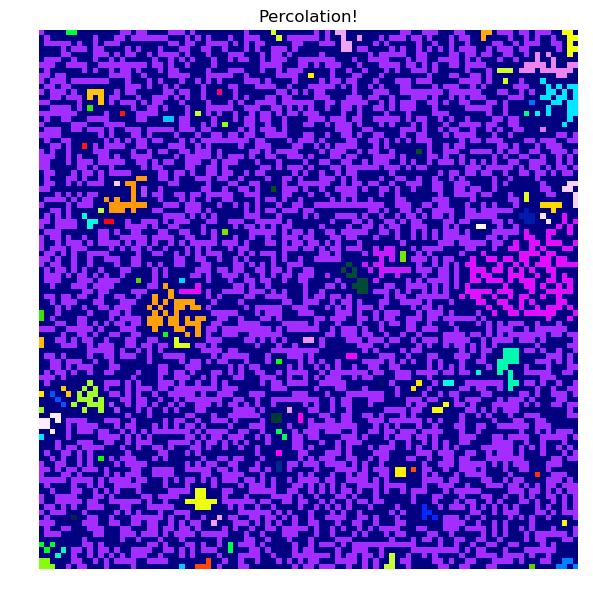

In [9]:
clusterplot(site)

# Triangular lattice

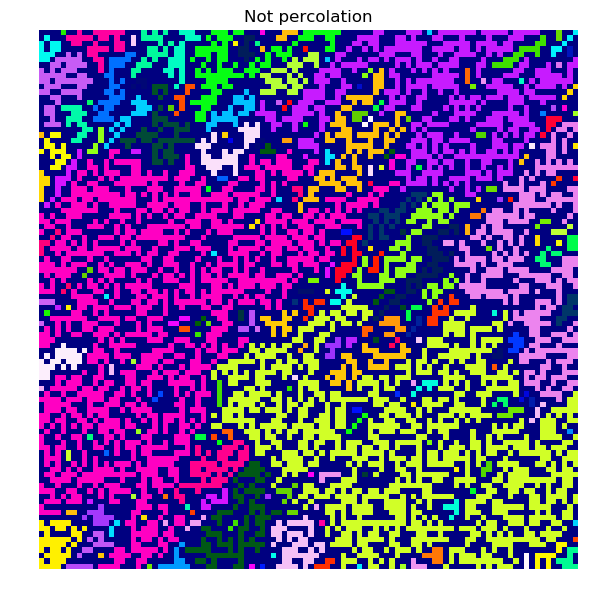

In [10]:
N = 100; p = 0.5;
tri = Tri(N, p)
cluster!(tri)
clusterplot(tri)

# Honeycomb lattice

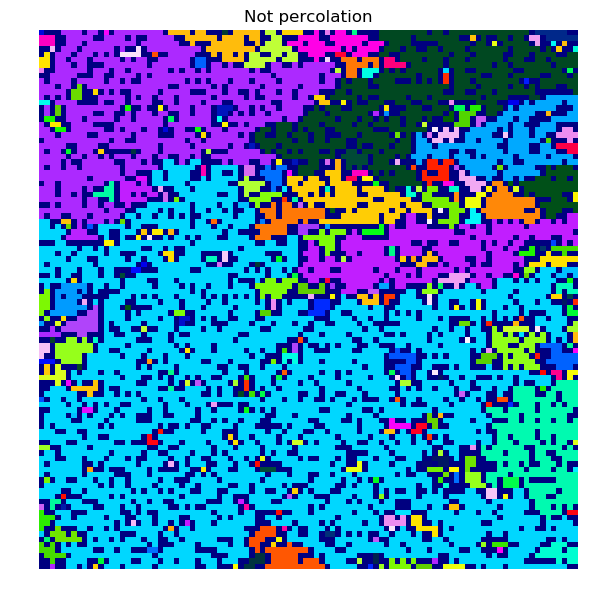

In [11]:
site = Honeycomb(100, 0.7)
cluster!(site)
clusterplot(site)

# Kagome lattice

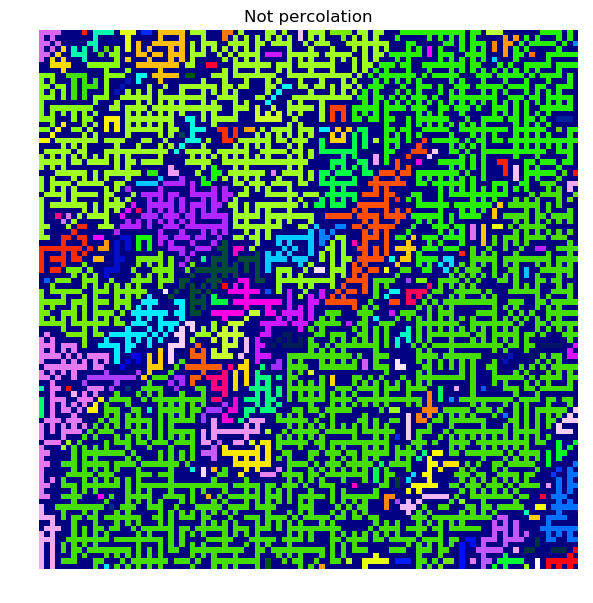

In [12]:
site = Kagome(100, 0.65)
cluster!(site)
clusterplot(site)

# d dimensional simple lattice

In [13]:
N = 20; dim = 3; p = 0.4;
simple = Simplenn(N, dim, p);
cluster!(simple)

In [14]:
fieldnames(simple)

7-element Array{Symbol,1}:
 :N                  
 :dim                
 :p                  
 :lattice            
 :clustersize        
 :NearestNeighborList
 :ispercolation      

In [15]:
simple.lattice

20×20×20 Array{Int64,3}:
[:, :, 1] =
 24  24   1  1   1   1  1  8   8   8  12  12  12  12  32  18  18  18   0  21
  1   1   1  1   1   1  3  3   8   3   0  12  12  31  16  34  18  36  21  21
  1   1   1  1   1   1  6  3   3   3   3   0   0  31  16  34  34   3   3  21
  1   1   1  1   1   6  6  6   3   3   0   0  14  31  31  17   3   3   3   3
  1   1   1  1   1   1  6  3   3   3   0  28  14  14  17  17  17   3   3   3
  1   1   1  1   1   1  1  0   3   3   3   0  30  14  17  17  17  17   3  22
  2   1   1  1   1   1  1  0   0   3   3  14  14  14  14  17  17   0  22  22
  2  25   1  1  27  27  0  0   9   3  13  13  14  15  14  14  19   0  20  22
 25  25   4  5   5   5  5  9   9   9   3  13  15  15  15  35  19  20  20  20
  0   4   4  4   5   5  3  3   9  10   0   3   3  15  33  19  19  19  38  20
  0   3   4  3   3   3  3  3  10  10  11  11   3   3   3   3  19   0   0  39
  3   3   3  3   3   3  3  3   3  11  11  11  11   3   3   3   3  37   3   3
  3   3  26  3   3   3  3  3   3   3  1

In [16]:
simple.ispercolation

true

# Percolating probability

## square lattice, nearest neighbor

 45

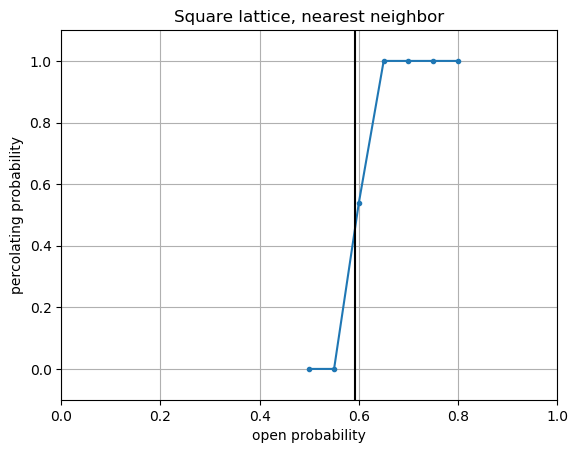

.139192 seconds (21.68 M allocations: 104.624 GiB, 24.59% gc time)


In [17]:
plist = collect(0.5:0.05:0.8)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = Squarenn(N, plist[i])
        cluster!(square)
        hit[i] += square.ispercolation
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.593, 0.593], [-0.5, 1.1], "k")
grid("on")
title("Square lattice, nearest neighbor")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## square lattice, next nearest neighbor

 55

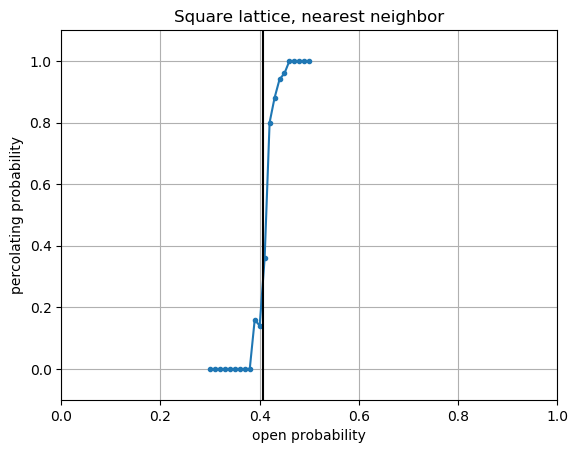

.095844 seconds (44.70 M allocations: 95.739 GiB, 22.76% gc time)


In [18]:
plist = collect(0.3:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = Squarennn(N, plist[i])
        cluster!(square)
        hit[i] += square.ispercolation
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.407, 0.407], [-0.5, 1.1], "k")
grid("on")
title("Square lattice, nearest neighbor")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## triangular lattice

 69

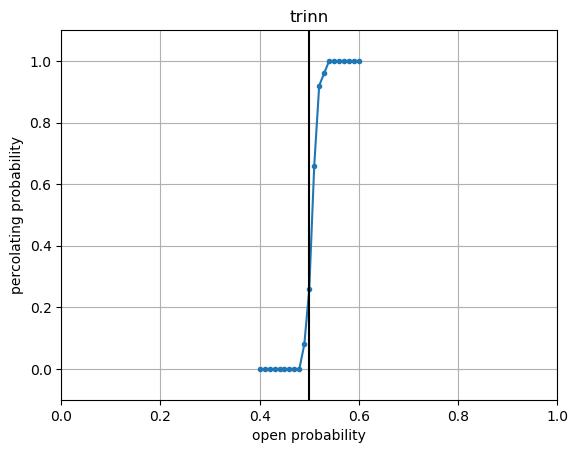

.427075 seconds (52.77 M allocations: 134.285 GiB, 21.56% gc time)


In [19]:
plist = collect(0.4:0.01:0.6)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        tri = Tri(N, plist[i])
        cluster!(tri)
        hit[i] += tri.ispercolation
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.5, 0.5], [-0.5, 1.1], "k")
grid("on")
title("trinn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## simple lattice

 29

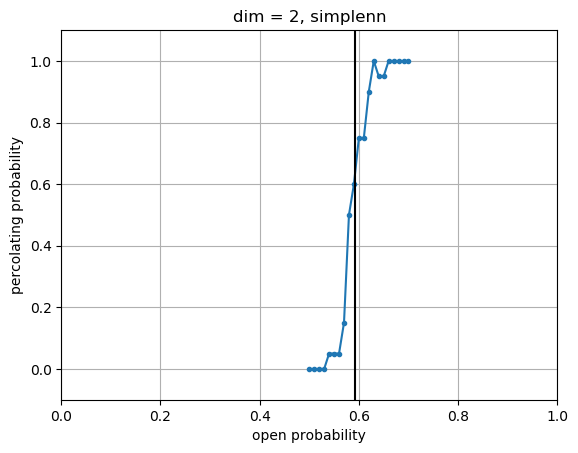

.609068 seconds (58.41 M allocations: 6.895 GiB, 5.05% gc time)


In [20]:
plist = collect(0.5:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 50; trial = 20; dim = 2
@time for i in 1:length(plist)
    for itr in 1:trial
        square = Simplenn(N, dim, plist[i])
        cluster!(square)
        hit[i] += square.ispercolation
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.593, 0.593], [-0.5, 1.1], "k")
grid("on")
title("dim = $dim, simplenn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

 28

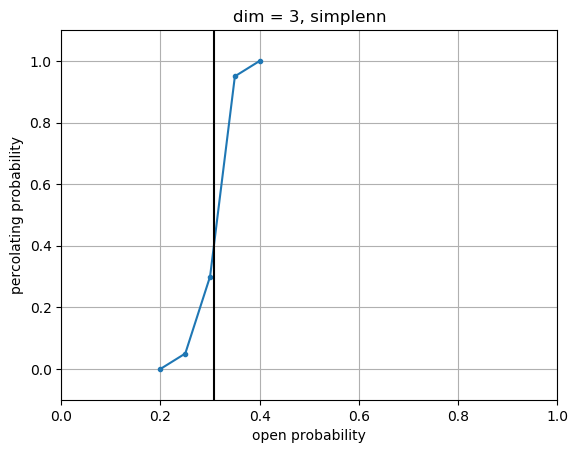

.136808 seconds (39.92 M allocations: 5.024 GiB, 3.46% gc time)


In [21]:
plist = collect(0.2:0.05:0.4)
hit = zeros(Int64, length(plist))
N = 20; trial = 20; dim = 3
@time for i in 1:length(plist)
    for itr in 1:trial
        site = Simplenn(N, dim, plist[i])
        cluster!(site)
        hit[i] += site.ispercolation
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.307, 0.307], [-0.5, 1.1], "k")
grid("on")
title("dim = $dim, simplenn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## honeycomb lattice

 24

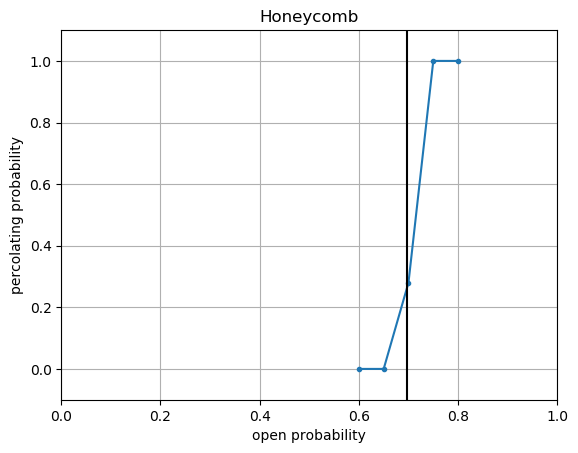

.371564 seconds (13.87 M allocations: 51.478 GiB, 20.16% gc time)


In [22]:
plist = collect(0.6:0.05:0.8)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = Honeycomb(N, plist[i])
        cluster!(site)
        hit[i] += site.ispercolation
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.6962, 0.6962], [-0.5, 1.1], "k")
grid("on")
title("Honeycomb")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## Kagome lattice

 19

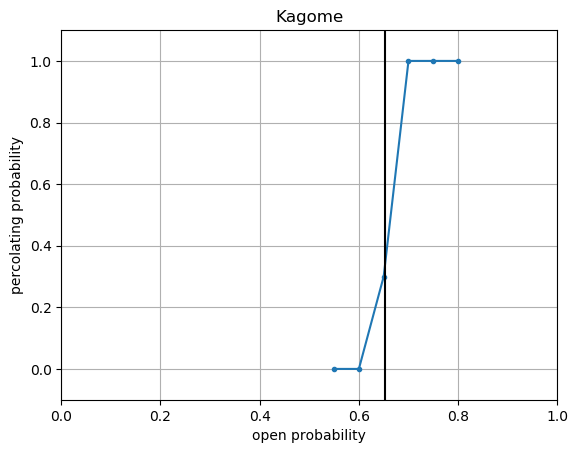

.590646 seconds (14.22 M allocations: 44.707 GiB, 22.72% gc time)


In [23]:
plist = collect(0.55:0.05:0.8)
#plist = collect(0.0:0.1:1)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = Kagome(N, plist[i])
        cluster!(site)
        hit[i] += site.ispercolation
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.6527, 0.6527], [-0.5, 1.1], "k")
grid("on")
title("Kagome")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);